Криптоанализ шифра простой замены.


Самая первая идея, которая приходит в голову, если появляется потребность декодировать шифротекст, не имея ключа - это подобрать все возможные варианты перестановок. Такой способ может оказаться полезным, однако нужно понимать, что количество разных перестановок равняется m!, где m - мощность алфавита. 

Почти во всех современных языках более $25$ букв (в английском $26$, в русском $33$), в таком случае количество возможных перестановок будет равняться $26!$ и $33!$ соответственно (и это без учета специальных знаков). Вычислительная сложность данного подхода не позволяет применять его на практике. Однако, это не значит, что шифр надежен

Уязвимость данного шифра заключается в частоте встречаемых букв в алфавите. Действительно, в любой книге или статье буква "а" встречается явно чаще, чем "ъ". При шифровании данным способом, частота встречаемости символа в исходном тексте перейдет в шифротекст. Таким способом можно легко определить исходную перестановку. Давайте убедимся в этом.

Я взял текст романа "Война и мир" (французский текст был переведен на русский), убрал оттуда все латинские символы. Давайте проверим, какие символы в данном тексте встречаются чаще всего, а какие реже


In [2]:
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
with open('Russian_text.txt') as f:
    text = f.read().replace('\n', ' ')
text = text.lower() #Заглавные символы и строчные считаем одинаковыми
letters = re.findall(r'[а-яё]', text)
counts = Counter(letters)

total = sum(counts.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")

for char, count in counts.most_common():
    percent = (count / total) * 100
    print(f"'{char}':    {count}     {percent:.3f}%") 

Буква   Кол-во   %
'о':    170350     11.440%
'е':    122691     8.240%
'а':    122599     8.233%
'и':    98730     6.630%
'н':    97847     6.571%
'т':    86561     5.813%
'с':    78317     5.260%
'л':    75534     5.073%
'в':    67509     4.534%
'р':    66235     4.448%
'к':    51504     3.459%
'д':    45244     3.038%
'м':    44492     2.988%
'у':    41408     2.781%
'п':    38662     2.596%
'я':    33406     2.243%
'ь':    29566     1.986%
'г':    29329     1.970%
'ы':    28763     1.932%
'б':    26480     1.778%
'з':    25312     1.700%
'ч':    21693     1.457%
'й':    17263     1.159%
'ж':    15497     1.041%
'ш':    13760     0.924%
'х':    12876     0.865%
'ю':    9488     0.637%
'ц':    5328     0.358%
'э':    4762     0.320%
'щ':    4237     0.285%
'ф':    2932     0.197%
'ъ':    659     0.044%
'ё':    22     0.001%


Теперь можно сделать вывод, что буква "о" встречается чаще всего, а "ё" реже всего. Построим график для наглядности


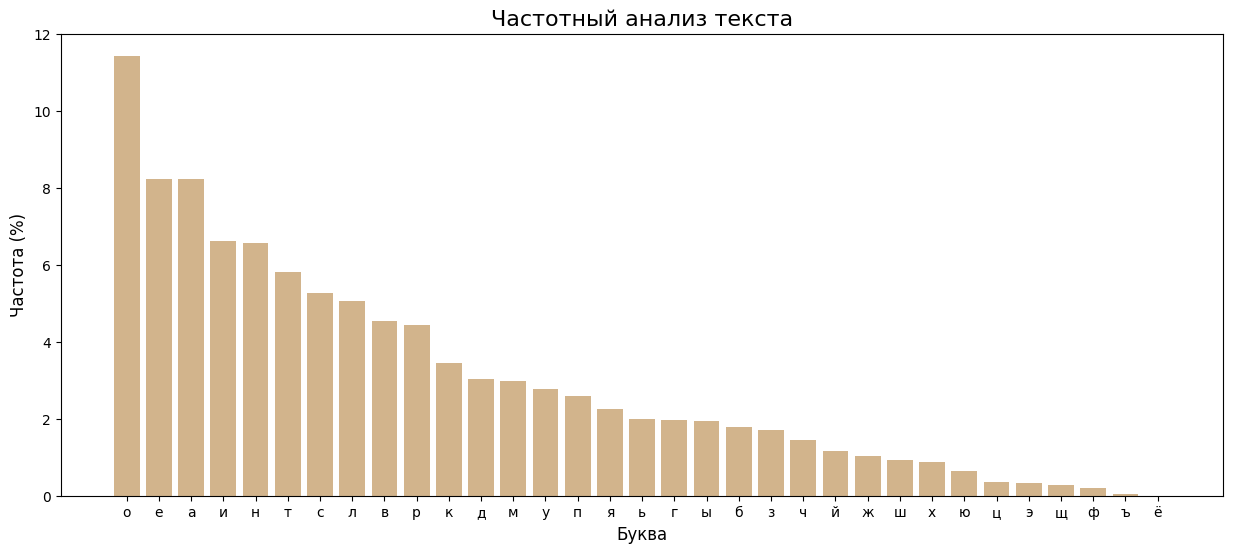

In [ ]:
sorted_items = counts.most_common()
labels = [item[0] for item in sorted_items]
values = [(item[1] / total) * 100 for item in sorted_items]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ текста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Теперь зашифруем первые две тысячи символов этого же текста с помощью ключа "мфыэжщшцлнбюкъярпаьсчтхдгевиозёуй". Я сохранил себе шифртекст в файл cryptotext_test.txt, давайте построим такую же диаграмму 

In [7]:
with open("cryptotext_test.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
print(letters_count)
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
Counter({'р': 192, 'м': 170, 'щ': 146, 'н': 143, 'с': 129, 'я': 121, 'ы': 95, 'ь': 91, 'к': 89, 'а': 81, 'ю': 70, 'ж': 52, 'п': 51, 'ъ': 49, 'ч': 46, 'л': 40, 'э': 36, 'й': 32, 'б': 30, 'з': 29, 'г': 25, 'о': 21, 'ф': 21, 'д': 15, 'ц': 15, 'х': 13, 'ё': 10, 'е': 7, 'у': 7, 'т': 5, 'в': 4, 'ш': 3, 'и': 3})
'р':    192     10.429%
'м':    170     9.234%
'щ':    146     7.930%
'н':    143     7.768%
'с':    129     7.007%
'я':    121     6.573%
'ы':    95     5.160%
'ь':    91     4.943%
'к':    89     4.834%
'а':    81     4.400%
'ю':    70     3.802%
'ж':    52     2.825%
'п':    51     2.770%
'ъ':    49     2.662%
'ч':    46     2.499%
'л':    40     2.173%
'э':    36     1.955%
'й':    32     1.738%
'б':    30     1.630%
'з':    29     1.575%
'г':    25     1.358%
'о':    21     1.141%
'ф':    21     1.141%
'д':    15     0.815%
'ц':    15     0.815%
'х':    13     0.706%
'ё':    10     0.543%
'е':    7     0.380%
'у':    7     0.380%
'т':    5     0.272%
'в':    4 

Построим график

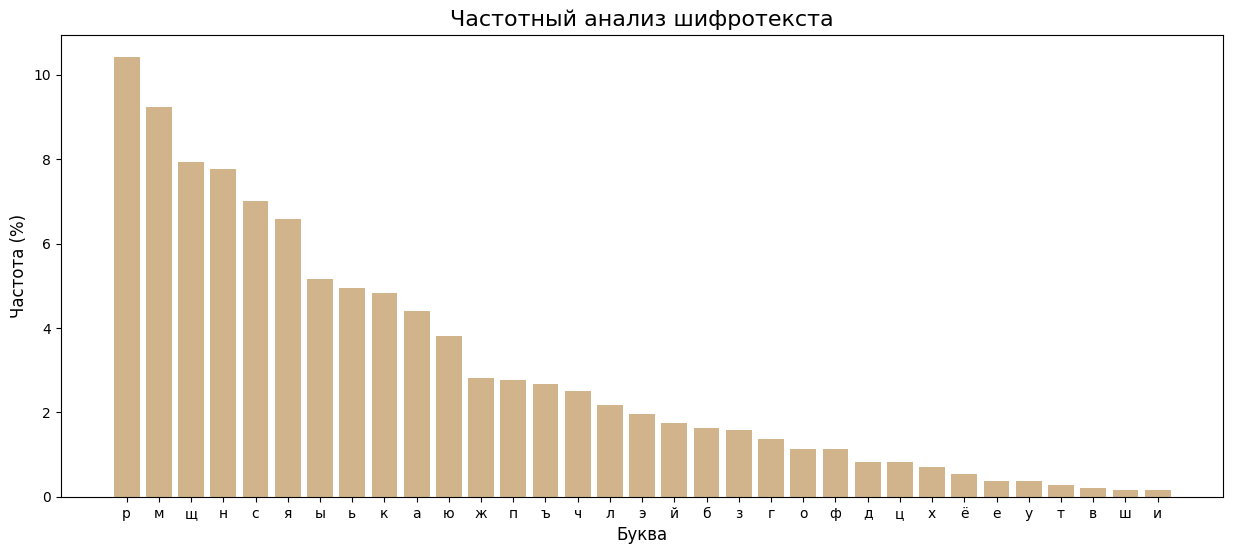

In [8]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Из этого графика видно, какие буквы чаще встречаются в шифротексте, а какие реже. Из этого можно сделать вывод, что частовстречаемые буквы в исходном тексте перейдут в частовстречаемые буквы в шифротексте. Так, буква "о' перешла в 'щ' , 'р', 'м'. Да, взаимнооднозначного соответствия построить нельзя, но перебирать перестановки необходимо меньше, что позволяет декодировать шифротекст.


Криптоанализ аффинного шифра.


Аффинный шифр остается моноалфавитным шифром подстановки, поэтому каждой букве открытого текста соответсвует ровно одна буква шифротекста. Но взломать аффинный шифр можно и без частотного анализа, просто перебрав все возможные ключи. Возьмем за основу русский алфавит за $33$ буквами. Вторая буква ключа (b) может быть любой от $0$ до $32$, всего $33$ различных варианта. Первая буква ключа (а) должна удовлетворять уравнению $НОД(а, m) = 1.$ Посчитать все возможные взаимно простые числа для m можно с помощью функции Эйлера. Функция задается формулой:

$$ \phi(n) = n \prod_{p|n} \left( 1 - \frac{1}{p} \right), \quad n > 1, $$
где $p$ - простое число и пробегает все значения, участвующие в разложении $n$ на простые множители 

Так, $$33 = 3 \cdot 11$$

Тогда $$ \phi(33) = 33 \cdot \left(1 - \frac{1}{3}\right) \cdot \left(1 - \frac{1}{11}\right) = 33 \cdot \frac{2}{3} \cdot \frac{10}{11} = 20$$



Тогда все возможные варианты ключей $$20 \cdot 33 = 660 $$

Очевидно, что любой современный (и даже не самый современный) компьютер может перебрать все возможные ключи обычным перебором. Однако, аффинный шифр был придуман несколько тысяч лет назад и ни о каком компьютерном переборе речи и быть не могло, поэтому дешифровать текст можно и вручную, воспользовавшись частотным анализом

Мною был зашифрован небольшой текст в affine_test.txt, составим частотный анализ шифротекста


In [11]:
with open("affine_test.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
'д':    192     10.429%
'й':    170     9.234%
'э':    146     7.930%
'м':    143     7.768%
'у':    129     7.007%
'а':    121     6.573%
'с':    95     5.160%
'п':    91     4.943%
'ш':    89     4.834%
'л':    81     4.400%
'ф':    70     3.802%
'щ':    52     2.825%
'з':    51     2.770%
'ь':    49     2.662%
'ч':    46     2.499%
'и':    40     2.173%
'х':    36     1.955%
'ё':    32     1.738%
'р':    30     1.630%
'ъ':    29     1.575%
'ж':    25     1.358%
'ц':    21     1.141%
'н':    21     1.141%
'г':    15     0.815%
'е':    15     0.815%
'я':    13     0.706%
'ю':    10     0.543%
'к':    7     0.380%
'в':    7     0.380%
'ы':    5     0.272%
'о':    4     0.217%
'б':    3     0.163%
'т':    3     0.163%


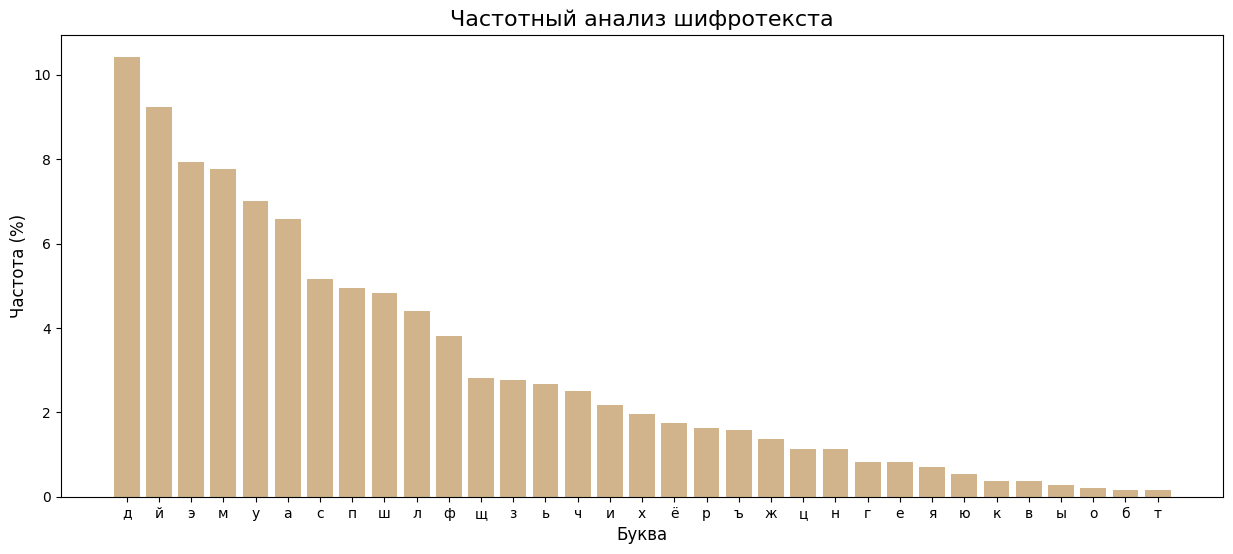

In [10]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Посколько шифр моноалфавитный, очевидно, что "о" перешла в "д" и так далее.

Криптоанализ рекуррентного аффинного шифра

Аффинный рекуррентный шифр - усиление обычного аффинного шифра, поскольку является полиалфавитным. Зашифруем текст и проверим. Сразу можно заметить, что в слове "толстой" разные буквы "c" и "т" зашифровались в одну и ту же букву "я". Это делает частотный анализ затруднительным. Построим график для наглядности

In [3]:
with open("affine_recur_test.txt") as file:
    text = file.read()
letters = re.findall("[а-яё]", text)

letters_count = Counter(letters)
total_count = sum(letters_count.values())
print(f"{'Буква'}   {'Кол-во'}   {'%'}")
print(letters_count)
for char, l_count in letters_count.most_common():
    percent = (l_count / total_count) * 100
    print(f"'{char}':    {l_count}     {percent:.3f}%") 

Буква   Кол-во   %
Counter({'м': 76, 'я': 75, 'ы': 71, 'в': 71, 'т': 69, 'й': 67, 'о': 67, 'ь': 66, 'и': 62, 'с': 61, 'з': 61, 'л': 59, 'е': 57, 'ш': 57, 'а': 57, 'ъ': 57, 'ц': 56, 'д': 55, 'х': 54, 'ж': 54, 'г': 54, 'п': 53, 'у': 53, 'н': 51, 'р': 50, 'щ': 47, 'б': 43, 'к': 42, 'э': 42, 'ю': 42, 'ё': 41, 'ф': 39, 'ч': 32})
'м':    76     4.128%
'я':    75     4.074%
'ы':    71     3.857%
'в':    71     3.857%
'т':    69     3.748%
'й':    67     3.639%
'о':    67     3.639%
'ь':    66     3.585%
'и':    62     3.368%
'с':    61     3.313%
'з':    61     3.313%
'л':    59     3.205%
'е':    57     3.096%
'ш':    57     3.096%
'а':    57     3.096%
'ъ':    57     3.096%
'ц':    56     3.042%
'д':    55     2.988%
'х':    54     2.933%
'ж':    54     2.933%
'г':    54     2.933%
'п':    53     2.879%
'у':    53     2.879%
'н':    51     2.770%
'р':    50     2.716%
'щ':    47     2.553%
'б':    43     2.336%
'к':    42     2.281%
'э':    42     2.281%
'ю':    42     2.281%
'ё':    41    

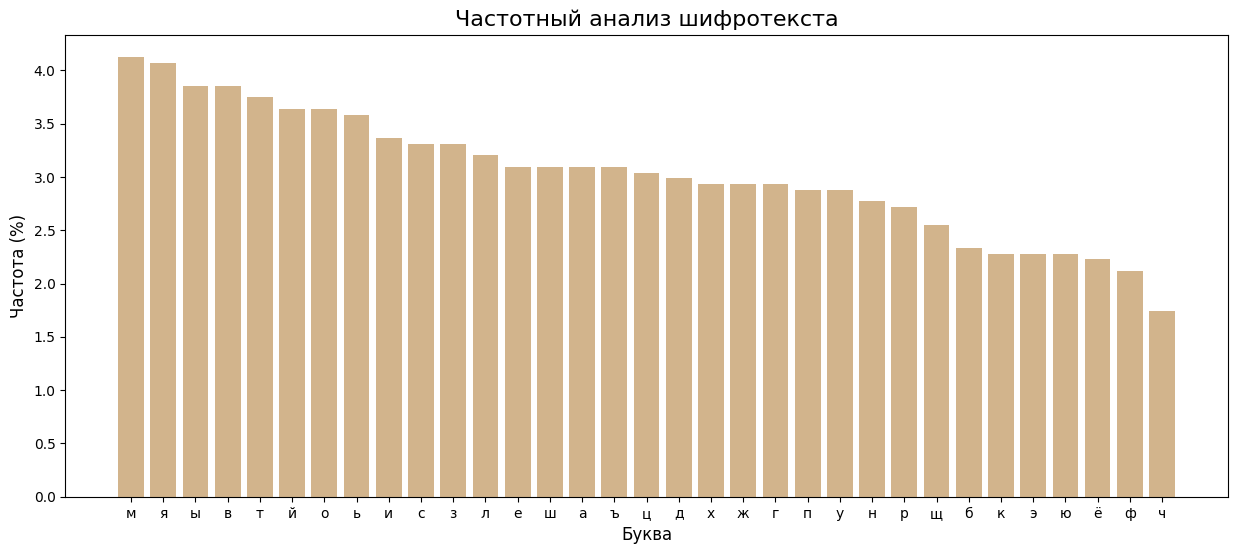

In [4]:
sorted_items_crypto = letters_count.most_common()
labels = [item[0] for item in sorted_items_crypto]
values = [(item[1] / total_count) * 100 for item in sorted_items_crypto]


plt.figure(figsize=(15, 6))


plt.bar(labels, values, color='tan')

plt.title('Частотный анализ шифротекста', fontsize=16)
plt.xlabel('Буква', fontsize=12)
plt.ylabel('Частота (%)', fontsize=12)


plt.show()

Как мы можем заметить, в шифротексте буквы встречаются почти равномерно и это не позволяет сделать обычный криптоанализ и сказать, что самая встречаемая буква в шифротексте точно будет являться самой встречаемой в языке.

Проверим, возможно ли перебрать все возможные ключи для русского языка. $a_1, a_2$ принимают все возможные значения, для которых $НОД(a_i, m) = 1 \pmod m$, а $b_i$ принимает все возможные значения по модулю от $0$ до $m-1$. Тогда все возможные значения равны
 

$$ \phi(33) \cdot 33 \cdot \phi(33) \cdot 33 = 435600 $$

Очевидно, перебрать все возможные ключи не составляет труда

Максимальное возможное число различных ключей равно
$$ (m - 2)^2 \cdot m^2 = m^4 - 4m^3 + 4m^2$$
В случае, если m - простое число
С учетом того, что в большинстве случаев $ m <= 40 $, перебрать все возможные ключи несложно